In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from scipy.fft import dct, idct

from scipy.spatial.distance import squareform
from scipy.spatial.distance import pdist
from scipy.spatial import distance_matrix

import sys
sys.path.append('../notebooks/')
from helpers import title

In [72]:
df = pd.read_csv('../contours/liber-antiphons-phrase-contours.csv', index_col=0)
lengths = df['phrase_length']
phrases = df[[str(i) for i in range(50)]]

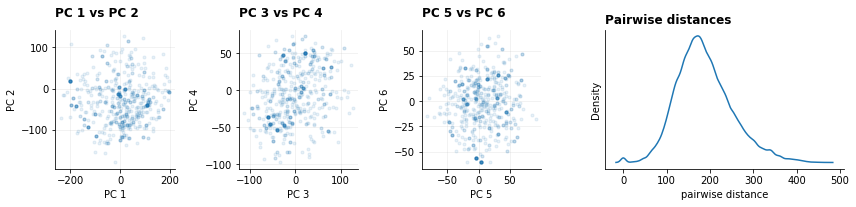

In [101]:
def show_pca_subplot(cont, comp1, comp2, ax):
    ax.plot(cont[:, comp1], cont[:, comp2], '.', alpha=.1)
    title(f'PC {comp1} vs PC {comp2}', ax=ax, y=1.05)
    ax.set_xlabel(f'PC {comp1}')
    ax.set_ylabel(f'PC {comp2}')
    sns.despine(ax=ax)
    ax.grid(True, alpha=.2)
    
    a, b = ax.get_ylim()
    if np.abs(a-b) < 10e-10:
        ax.set_ylim(-1, 1)
        
    a, b = ax.get_xlim()
    if np.abs(a-b) < 10e-10:
        ax.set_xlim(-1, 1)
        
def show_pd_plot(cont, ax):
    pm = pdist(cont[:, 1:])
    sns.kdeplot(pm, ax=ax)
    sns.despine(ax=ax)
    ax.set_yticks([])
    ax.set_xlabel('pairwise distance')
    title('Pairwise distances', ax=ax)

def show_pca(cont):
    fig, axs = plt.subplots(1, 4, figsize=(12, 3), tight_layout=True,
                           gridspec_kw=dict(width_ratios=[1,1,1,2]))
    show_pca_subplot(cont, 1, 2, axs[0])
    show_pca_subplot(cont, 3, 4, axs[1])
    show_pca_subplot(cont, 5, 6, axs[2])
    show_pd_plot(cont, ax=axs[3])

cos_contours = dct(phrases[lengths == 8])
show_pca(cos_contours)
# plt.suptitle('Length 2', y=1.07, fontsize=14, fontweight='bold')

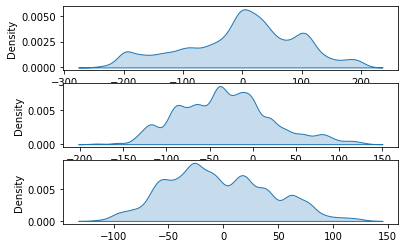

In [102]:
plt.subplot(311)
sns.kdeplot(cos_contours[:, 1], fill=True, bw_adjust=.5)
plt.subplot(312)
sns.kdeplot(cos_contours[:, 2], fill=True, bw_adjust=.5)
plt.subplot(313)
sns.kdeplot(cos_contours[:, 3], fill=True, bw_adjust=.5)
# plt.subplots(311)
# sns.kdeplot(cos_contours[:, 0], fill=True)

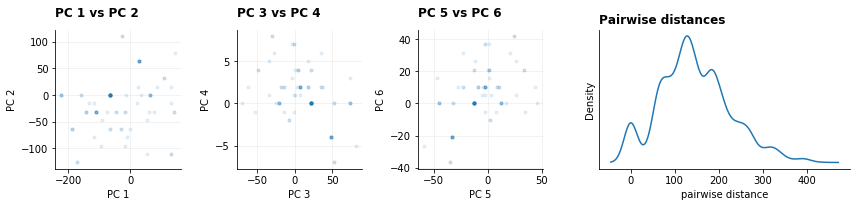

In [74]:
cos_contours = dct(phrases[lengths == 4])
show_pca(cos_contours)

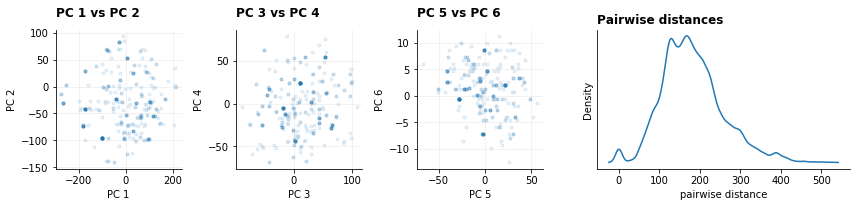

In [76]:
cos_contours = dct(phrases[lengths == 6])
show_pca(cos_contours)

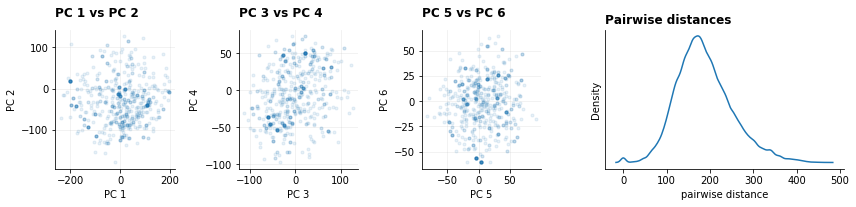

In [77]:
cos_contours = dct(phrases[lengths == 8])
show_pca(cos_contours)

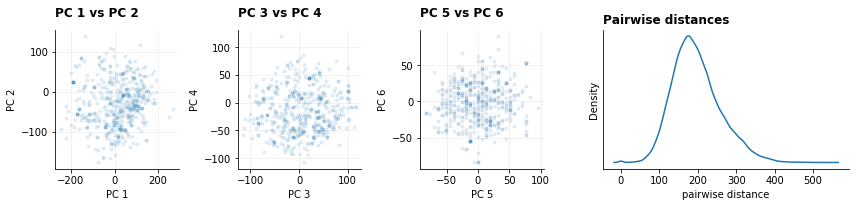

In [78]:
cos_contours = dct(phrases[lengths == 10])
show_pca(cos_contours)

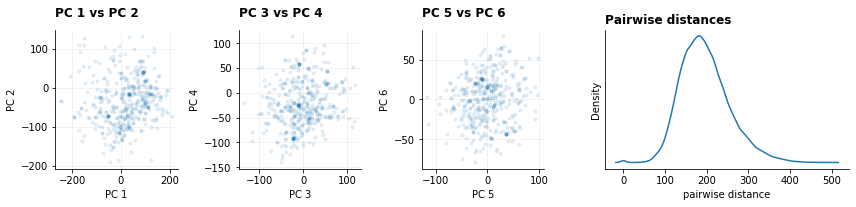

In [79]:
cos_contours = dct(phrases[lengths == 12])
show_pca(cos_contours)

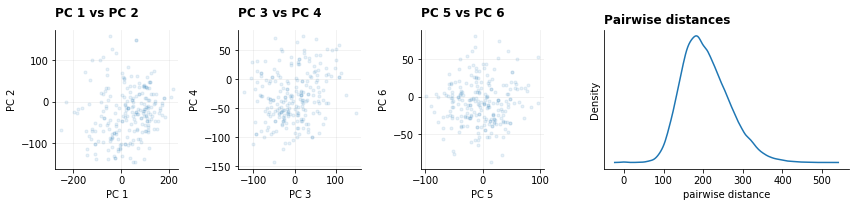

In [80]:
cos_contours = dct(phrases[lengths == 14])
show_pca(cos_contours)

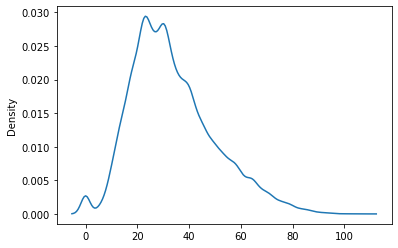

In [86]:
sns.kdeplot(pdist(phrases[lengths == 6]))

In [43]:
np.unique(phrases[lengths==8], axis=0).shape

(934, 50)

In [47]:
phrases[lengths==8].values.shape

(1154, 50)

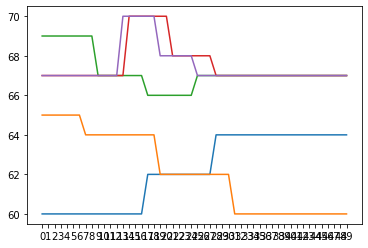

In [65]:
plt.plot(phrases[lengths==4].iloc[:5, :].T)

In [54]:
for i in range(20):
    print(np.unique(phrases[lengths==8].iloc[i]).shape)

(6,)
(6,)
(4,)
(6,)
(6,)
(4,)
(3,)
(4,)
(4,)
(4,)
(5,)
(4,)
(4,)
(4,)
(4,)
(4,)
(5,)
(4,)
(4,)
(4,)
